In [47]:
import pandas as pd
import urllib  
import csv

In [100]:
url = 'C:/Users/Ashwin/Documents/topmentor/Batch-59-Datasets-main/Uber_raw_2019.csv'


In [101]:
df = pd.read_csv(url)

In [54]:
df.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409565 entries, 0 to 409564
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  409565 non-null  object 
 1   Lat        409565 non-null  float64
 2   Lon        409565 non-null  float64
 3   Base       409565 non-null  object 
dtypes: float64(2), object(2)
memory usage: 12.5+ MB


In [56]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409565 entries, 0 to 409564
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  409565 non-null  datetime64[ns]
 1   Lat        409565 non-null  float64       
 2   Lon        409565 non-null  float64       
 3   Base       409565 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 12.5+ MB


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409565 entries, 0 to 409564
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  409565 non-null  datetime64[ns]
 1   Lat        409565 non-null  float64       
 2   Lon        409565 non-null  float64       
 3   Base       409565 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 12.5+ MB


In [60]:
df['Lat'] = df['Lat'].astype('float32')
df['Lon'] = df['Lon'].astype('float32')

In [61]:
df.head()

,Date/Time,Lat,Lon,Base
0,2019-09-01 00:01:00,40.220100,-74.002098,B02512
1,2019-09-01 00:01:00,40.750000,-74.002701,B02512
2,2019-09-01 00:03:00,40.755901,-73.986397,B02512
3,2019-09-01 00:06:00,40.744999,-73.988899,B02512
4,2019-09-01 00:11:00,40.814499,-73.944397,B02512


In [62]:
df['day'] = df['Date/Time'].dt.day


In [63]:
df['month'] = df['Date/Time'].dt.month

In [64]:
df['weekday'] = df['Date/Time'].dt.weekday

In [65]:
df['hrs'] = df['Date/Time'].dt.hour

In [66]:
df.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
day          0
month        0
weekday      0
hrs          0
dtype: int64

In [67]:
import seaborn as sns

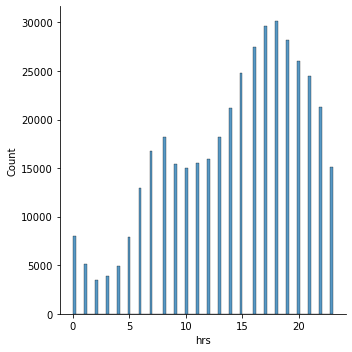

In [78]:
sns.displot(df['hrs'])

<AxesSubplot:xlabel='Lat', ylabel='Lon'>

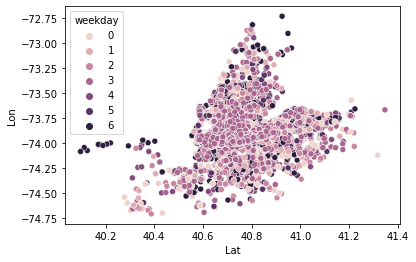

In [79]:
sns.scatterplot(x = 'Lat',y = 'Lon',hue='weekday',data=df)

In [80]:
df1 = df.groupby(['weekday','hrs']).apply(lambda x:len(x))

In [86]:
df1

hrs,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,521,305,230,535,925,1684,2714,3374,3513,2586,...,3429,3953,4283,4762,4642,4144,3939,3423,2549,1559
1,713,461,296,442,752,1552,2736,3363,3454,2828,...,3440,4253,4805,5242,5215,4756,4624,3967,3212,1818
2,972,562,365,526,829,1086,2410,3316,3543,2863,...,3777,4546,5089,5587,5995,5532,5154,4876,3886,2637
3,1251,752,495,633,946,1647,2620,3374,3605,3003,...,3774,4391,4983,5653,6066,6047,5280,5503,5541,4712
4,1706,1122,706,476,348,340,526,710,953,1085,...,2133,2414,2579,2776,2854,2742,2422,2713,3034,2649
5,1830,1237,823,566,334,358,387,564,813,1024,...,1811,1988,2147,2036,1909,1708,1616,1444,1162,629
6,1022,691,520,702,776,1193,1552,2100,2285,2053,...,2799,3240,3565,3595,3469,3222,3004,2542,1935,1098


In [93]:
df1 = df1.unstack()


In [94]:
df1

weekday,0,1,2,3,4,5,6
hrs,,,,,,,
0,521,713,972,1251,1706,1830,1022
1,305,461,562,752,1122,1237,691
2,230,296,365,495,706,823,520
3,535,442,526,633,476,566,702
4,925,752,829,946,348,334,776
5,1684,1552,1086,1647,340,358,1193
6,2714,2736,2410,2620,526,387,1552
7,3374,3363,3316,3374,710,564,2100
8,3513,3454,3543,3605,953,813,2285


<AxesSubplot:xlabel='weekday', ylabel='hrs'>

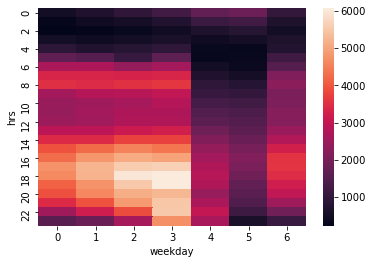

In [95]:
sns.heatmap(df1)

correlation shown between weekday and hrs are given above


In [99]:
df1.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='weekday')